## Importing neccessary libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

### Changing directory to access the excel files

In [60]:
import os
os.getcwd()

'C:\\Users\\rohit\\Downloads'

In [61]:
os.chdir("C:\\Users\\rohit\\Downloads")

### Importing Datasets

In [62]:
inventory_df = pd.read_excel('Inventory Dataset.xlsx')

In [63]:
new_inventory_df = pd.read_excel('New Inventory.xlsx')

In [64]:
inventory_df.head()

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399


In [65]:
new_inventory_df.head()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000


### Checking for Null or missing values

In [66]:
inventory_df.isnull().sum()

Item Number    0
Date           0
Inventory      0
dtype: int64

In [67]:
new_inventory_df.isnull().sum()

Item Number          0
Inventory Receive    0
Total Item Qty       0
dtype: int64

In [68]:
inventory_df.shape #getting number of rows and columns

(356, 3)

In [69]:
new_inventory_df.shape #getting number of rows and columns

(1039, 3)

### Dropping Duplicates if any

In [70]:
inventory_df.drop_duplicates()

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [71]:
new_inventory_df.drop_duplicates()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


### Exploring Datasets

In [72]:
inventory_df.describe()

,Inventory
count,356.000000
mean,3898.971910
std,5325.313247
min,1.000000
25%,9.000000
50%,467.500000
75%,6819.000000
max,27104.000000


In [73]:
new_inventory_df.describe()

,Total Item Qty
count,1039.000000
mean,2393.439846
std,2513.943204
min,0.000000
25%,980.000000
50%,1664.000000
75%,2800.000000
max,23580.000000


In [74]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Item Number  356 non-null    object        
 1   Date         356 non-null    datetime64[ns]
 2   Inventory    356 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ KB


In [75]:
new_inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Number        1039 non-null   object        
 1   Inventory Receive  1039 non-null   datetime64[ns]
 2   Total Item Qty     1039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.5+ KB


### Merging both datasets

In [76]:
new_inventory_df['Date'] = new_inventory_df['Inventory Receive'] #convert col. name to date

In [77]:
merged_df = pd.merge(inventory_df, new_inventory_df, on=['Date','Item Number'], how='outer')

In [78]:
merged_df.drop('Inventory Receive',axis=1,inplace=True) #dropping inventory recieve column

In [79]:
merged_df

,Item Number,Date,Inventory,Total Item Qty
0,064-01-1347,2023-06-17,3561.0,NaN
1,064-01-1361,2023-06-17,4035.0,NaN
2,064-01-1375,2023-06-17,2684.0,NaN
3,064-01-1385,2023-06-17,5136.0,NaN
4,064-01-1399,2023-06-17,6399.0,NaN
...,...,...,...,...
1390,064-09-3787,2023-07-07,NaN,2088.0
1391,064-09-5287,2023-07-07,NaN,1388.0
1392,064-09-7924,2023-07-07,NaN,1632.0
1393,064-09-9076,2023-07-07,NaN,1708.0


In [80]:
merged_df['Total Item Qty'] = merged_df['Total Item Qty'].fillna(0)
merged_df['Inventory'] = merged_df['Inventory'].fillna(0)#filling null values with 0.

In [81]:
merged_df.head()

,Item Number,Date,Inventory,Total Item Qty
0,064-01-1347,2023-06-17,3561.0,0.0
1,064-01-1361,2023-06-17,4035.0,0.0
2,064-01-1375,2023-06-17,2684.0,0.0
3,064-01-1385,2023-06-17,5136.0,0.0
4,064-01-1399,2023-06-17,6399.0,0.0


In [82]:
# Calculate total inventory level at each date for each item
merged_df['Total_Inventory'] = merged_df['Inventory'] + merged_df['Total Item Qty']

In [83]:
merged_df.head(2)

,Item Number,Date,Inventory,Total Item Qty,Total_Inventory
0,064-01-1347,2023-06-17,3561.0,0.0,3561.0
1,064-01-1361,2023-06-17,4035.0,0.0,4035.0


In [84]:
#droping 'Inventory' and 'Total Item Qty' column
merged_df.drop(['Inventory','Total Item Qty'],axis=1,inplace=True)
merged_df.head(2)

,Item Number,Date,Total_Inventory
0,064-01-1347,2023-06-17,3561.0
1,064-01-1361,2023-06-17,4035.0


### Creating Pivot table from merged_df to get the details of total_inventory and item number datewise

In [85]:
merged_df.pivot_table(index='Item Number', columns='Date',values='Total_Inventory', aggfunc='sum').fillna(0)

Date,2023-06-17,2023-07-07,2023-07-09,2023-07-10,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-16,2023-08-18,...,2023-09-22,2023-09-24,2023-09-29,2023-10-08,2023-10-13,2023-10-22,2023-11-26,2023-12-01,2023-12-08,2023-12-15
Item Number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5488.0,0.0,1864.0,0.0,0.0,0.0,0.0,0.0
064-01-0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7380.0,0.0,2520.0,0.0,0.0,0.0,0.0,0.0
064-01-0006,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6840.0,0.0,3244.0,0.0,0.0,0.0,0.0,0.0
064-01-0013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6300.0,0.0,1748.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-18-9904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18700.0,0.0,5100.0
064-18-9909,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating Weekly Dates to shows data on a weekly basis

In [117]:
weekly_inventory = merged_df.groupby(['Item Number', pd.Grouper(key='Date', freq='W')]).sum()

In [127]:
#Let's look at the dataset
print(weekly_inventory.shape)
weekly_inventory.head()

(1311, 1)


Total_Inventory
Item Number Date                       
064-01-0003 2023-10-01           5488.0
            2023-10-15           1864.0
064-01-0005 2023-10-01           7380.0
            2023-10-15           2520.0
064-01-0006 2023-06-18             10.0

In [124]:
weekly_inventory_1 = weekly_inventory.sort_values('Date')
weekly_inventory_1.head()

,,Total_Inventory
Item Number,Date,
064-09-9949,2023-06-18,69.0
064-11-1026,2023-06-18,12337.0
064-11-0996,2023-06-18,18089.0
064-11-0594,2023-06-18,10957.0
064-11-0151,2023-06-18,13945.0


In [119]:
weekly_inventory_1.pivot_table(index='Item Number', columns='Date',values='Total_Inventory', aggfunc='sum').fillna(0)

Date,2023-06-18,2023-07-09,2023-07-16,2023-07-23,2023-07-30,2023-08-06,2023-08-20,2023-08-27,2023-09-10,2023-09-17,2023-09-24,2023-10-01,2023-10-08,2023-10-15,2023-10-22,2023-11-26,2023-12-03,2023-12-10,2023-12-17
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5488.0,0.0,1864.0,0.0,0.0,0.0,0.0,0.0
064-01-0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7380.0,0.0,2520.0,0.0,0.0,0.0,0.0,0.0
064-01-0006,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6840.0,0.0,3244.0,0.0,0.0,0.0,0.0,0.0
064-01-0013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6300.0,0.0,1748.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-18-9904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18700.0,0.0,5100.0
064-18-9909,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating monthly inventory levels to create a Barplot

In [130]:
monthly_inventory = merged_df.groupby(pd.Grouper(key='Date', freq='m')).sum()

In [131]:
monthly_inventory

,Total_Inventory
Date,
2023-06-30,1388034.0
2023-07-31,698592.0
2023-08-31,726094.0
2023-09-30,670252.0
2023-10-31,303826.0
2023-11-30,24848.0
2023-12-31,63172.0


In [132]:
import seaborn as sns

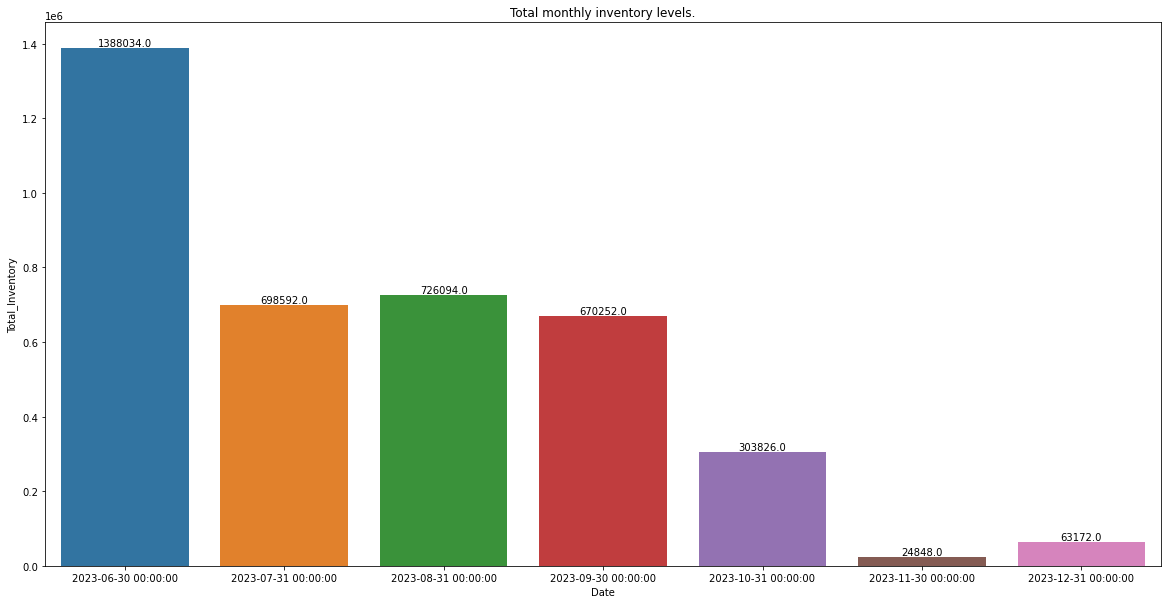

In [141]:
plt.figure(figsize=(20,10))
sns.barplot(x=monthly_inventory.index,y=monthly_inventory['Total_Inventory'],data=monthly_inventory)
# Add labels on top of the bars
for index, value in enumerate(monthly_inventory['Total_Inventory']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.title("Total monthly inventory levels.")
plt.show()